# NumPy的性能优势
下面以NumPy数组包含100万个整数，还有一个同样数据内容的Python列表，我们比较一下都乘以2的性能：

In [2]:
import numpy as np

my_arr=np.arange(1000000)
my_list=list(range(1000000))

In [3]:
%time for _ in range(10):my_arr2=my_arr*2

Wall time: 30 ms


In [4]:
%time for _ in range(10):my_list2=[x*2 for x in my_list]

Wall time: 1.24 s


NumPy的方法比Python方法要快10到100倍，并且使用的内存也更少。

# NumPy ndarray:多维数组对象
NumPy的核心特征之一就是N-维数组对象——ndarray。ndarray是Python中一个快速、灵活的大小数据集容器。数组允许你使用类似于标量的操作语法在整块数据上进行数学计算。

In [6]:
import numpy as np

# 生成随机数组
data=np.random.randn(2,3)
data

array([[ 0.95429836, -0.71525568,  0.16270814],
       [-1.3601842 , -1.36126008, -0.19305221]])

然后给data加上一个数学操作：

In [9]:
data*10

array([[  9.54298365,  -7.15255681,   1.62708145],
       [-13.60184201, -13.61260078,  -1.93052214]])

In [10]:
data+data

array([[ 1.90859673, -1.43051136,  0.32541629],
       [-2.7203684 , -2.72252016, -0.38610443]])

一个ndarray是一个通用的多维同类数据容器，也就是说，它包含的每一个元素均为相同类型。每一个数组都有一个shape属性，用来表征数组每一维度的数量；每一个数组都有一个dtype属性，用来描述数组的数据类型：

In [11]:
data.shape

(2, 3)

In [12]:
data.dtype

dtype('float64')

# 生成ndarray
生成数组最简单的方式就是使用array函数。

In [14]:
data1=[6,7.5,8,0,1]
arr1=np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

嵌套序列生成多维数组：

In [16]:
data2=[[1,2,3,4],[5,6,7,8]]
arr2=np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

因为data2是一个包含列表的列表，所以Numpy数组arr2形成了二维数组。我们可以通过检查ndim和shape属性来确认这一点：

In [18]:
arr2.ndim

2

In [19]:
arr2.shape

(2, 4)

除非显示地指定，否则np.array会自动推断生成数组的数据类型。数据类型被存储在一个特殊的元数据dtype中:

In [20]:
arr1.dtype

dtype('float64')

In [21]:
arr2.dtype

dtype('int32')

除了np.array,还有很多其他函数可以创建新数组。例如，给定程度及形状后，zeros可以一次性创造全0数组，ones可以一次性创造全1数组。empty则可以创建一个没有初始化数值的数组。需要创建高维数组，则需要为shape传递一个元组：

In [22]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [24]:
np.empty((2,3,2))

array([[[6.e-322, 0.e+000],
        [0.e+000, 0.e+000],
        [0.e+000, 0.e+000]],

       [[0.e+000, 0.e+000],
        [0.e+000, 0.e+000],
        [0.e+000, 0.e+000]]])

# NumPy数组算术
数组之所以重要是因为它允许你进行批量操作而无须进行任何for循环。NumPy用户称这种特性为向量化。任何在两个等尺寸数组之间的算术操作都应用了逐元素操作的方式：

In [3]:
arr=np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [4]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [5]:
arr-arr

array([[0., 0., 0.],
       [0., 0., 0.]])

带有标量计算的算术操作，会把计算参数传递给数组的每一个元素：

In [6]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

同尺寸数组之间的比较，会产生一个布尔值数组：

In [7]:
arr2=np.array([[0.,4.,1.],[7.,2.,12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [8]:
arr2>arr

array([[False,  True, False],
       [ True, False,  True]])

# 基础索引与切片
NumPy数组索引是一个大话题，有很多种方式可以让你选中数据的子集或某个单个元素。一维数组比较简单，看起来和Python的列表很类似：

In [14]:
import numpy as np
arr=np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
arr[5]

5

In [11]:
arr[5:8]

array([5, 6, 7])

In [17]:
arr[5:8]=12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

如你所见，如果你传入了一个数值给数组的切片，例如arr[5:8]=12,数值被传递给了整个切片。区别于Python的内建列表，数组的切片是原数组的视图。这意味着数组并不是被复制了，任何对于视图的修改都会反映到原数组上

当我改变arr_slice,变化也会体现在原数组上：

In [18]:
arr_slice=arr[5:8]
arr_slice[1]=12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

不写切片值的[:]将会引用数组的所有值：

In [20]:
arr_slice[:]=64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

假如你是NumPy新手，你可能会感到惊讶，因为其他的数组编程语言都是更为急切地复制数据。由于NumPy被设计成适合处理非常大的数组，你可以想象如果NumPy持续复制数据会引起多少内存问题。

在一个二维数组中，每个索引值对应的元素不再是一个值，而是一个一维数组：

In [23]:
arr2d=np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [28]:
arr2d[2]

array([7, 8, 9])

因此，单个元素可以通过递归的方式获得。但是要多写点代码，你可以通过传递一个索引的逗号分隔列表去选择单个元素，以下两种方式效果一样：

In [29]:
arr2d[0][2]

3

In [30]:
arr2d[0,2]

3

在多维数组中，你可以省略后续索引值，返回的对象将是降低一个维度的数组。因此在一个2*2*3的数组arr3d中：

In [51]:
arr3d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [52]:
arr3d.shape

(2, 2, 3)

arr3d[0]是一个2*3的数组

In [53]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

标量和数组都可以传递给arr3d[0]:

In [54]:
old_values=arr3d[0].copy()

In [55]:
arr3d[0]=42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [56]:
arr3d[0]=old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

类似地，arr3d[1,0]返回的是一个一维数组：

In [58]:
arr3d[1,0]

array([7, 8, 9])

# 数组的切片索引
与Python列表的一维对象类似，数组可以通过类似的语法进行切片：

In [59]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [61]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

二维数组的切片：

In [71]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

如你所见，数组沿着轴0进行了切片。表达式arr2d[:2]的含义是选择arr2d的前两“行”。  
你可以进行多组切片，与多组索引类似：

In [72]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

我可以选择第二行但是只选择前两列：

In [73]:
arr2d[1,:2]

array([4, 5])

类似地，我也可以选择第三列，但是只选择前两行：

In [74]:
arr2d[:2,2]

array([3, 6])

需要注意的是，单独一个冒号表示选择整个轴上的数组，因此你可以按照下面的方式在更高维度上进行切片：

In [75]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

当然对切片表达式赋值时，整个切片都会重新赋值：

In [77]:
arr2d[:2,1:]=0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

# 布尔索引
让我们考虑一下例子，假设我们的数据都在数组中，并且数组中的数据是一些存在重复的人名。我会使用numpy.random中的randn函数来生成一些随机状态分布的数据：

In [6]:
import numpy as np

names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data=np.random.randn(7,4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [9]:
data

array([[-0.30538262,  0.0870075 , -0.48374261, -0.20047826],
       [ 0.61373957,  0.05386487, -0.93564341,  1.21593505],
       [-0.29258668, -0.22148659, -0.89476662, -0.87425865],
       [-0.19530649,  0.83803286, -0.32211565, -2.66824779],
       [ 0.50783258,  0.48927395,  0.98258113,  0.24658262],
       [ 0.76543204, -0.27394291, -1.45385492,  0.30169954],
       [-0.18386544,  0.83979048, -1.33093809,  0.11467816]])

假设每个人名都和data数组中的一行相对应，并且我们想要选中所有‘Bob’对应的行。与数学操作类似，数组的比较操作（比如==）也是可以向量化的。因此，比较names数组和字符串'Bo'会产生一个布尔值数组：

In [7]:
names=='Bob'

array([ True, False, False,  True, False, False, False])

在索引数组时可以传入布尔值数组：

In [8]:
data[names=='Bob']

array([[-0.30538262,  0.0870075 , -0.48374261, -0.20047826],
       [-0.19530649,  0.83803286, -0.32211565, -2.66824779]])

布尔值数组的长度必须和数组轴索引长度一致。你甚至可以用切片或整数值（或整数值的序列）对布尔值数组进行混合和匹配。

在这些例子中，我选择了names=='Bob'的行，并索引了各个列：

In [10]:
data[names=='Bob',2:]

array([[-0.48374261, -0.20047826],
       [-0.32211565, -2.66824779]])

In [18]:
data[names=='Bob',3]

array([-0.20047826, -2.66824779])

In [19]:
data[names=='Bob',3:]

array([[-0.20047826],
       [-2.66824779]])

为了选择除了'Bob'以外的其他时间，你可以使用!=或在条件表达式前使用~对条件取反：

In [20]:
names!='Bob'

array([False,  True,  True, False,  True,  True,  True])

In [22]:
data[~(names=='Bob')]

array([[ 0.61373957,  0.05386487, -0.93564341,  1.21593505],
       [-0.29258668, -0.22148659, -0.89476662, -0.87425865],
       [ 0.50783258,  0.48927395,  0.98258113,  0.24658262],
       [ 0.76543204, -0.27394291, -1.45385492,  0.30169954],
       [-0.18386544,  0.83979048, -1.33093809,  0.11467816]])

~符号可以在你想要对一个通用条件进行取反时使用：

In [23]:
cond=names=='Bob'
data[~cond]

array([[ 0.61373957,  0.05386487, -0.93564341,  1.21593505],
       [-0.29258668, -0.22148659, -0.89476662, -0.87425865],
       [ 0.50783258,  0.48927395,  0.98258113,  0.24658262],
       [ 0.76543204, -0.27394291, -1.45385492,  0.30169954],
       [-0.18386544,  0.83979048, -1.33093809,  0.11467816]])

当要选择三个名字中的两个时，可以对多个布尔值条件进行联合，需要使用数学操作符如&(and)和|(or):

In [24]:
mask=(names=='Bob')|(names=='Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [25]:
data[mask]

array([[-0.30538262,  0.0870075 , -0.48374261, -0.20047826],
       [-0.29258668, -0.22148659, -0.89476662, -0.87425865],
       [-0.19530649,  0.83803286, -0.32211565, -2.66824779],
       [ 0.50783258,  0.48927395,  0.98258113,  0.24658262]])

使用布尔值索引选择数据时，总是生成数据的拷贝，即使返回的数组并没有如何变化。

基于常识来设置布尔值数组的值也是可行的。将data中所有的负值设置为0，我们需要做：

In [26]:
data[data<0]=0

In [27]:
data

array([[0.        , 0.0870075 , 0.        , 0.        ],
       [0.61373957, 0.05386487, 0.        , 1.21593505],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.83803286, 0.        , 0.        ],
       [0.50783258, 0.48927395, 0.98258113, 0.24658262],
       [0.76543204, 0.        , 0.        , 0.30169954],
       [0.        , 0.83979048, 0.        , 0.11467816]])

利用一维布尔值对每一行设置数值也是非常简单的：

In [28]:
data[names!='Joe']=7

In [29]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.61373957, 0.05386487, 0.        , 1.21593505],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.76543204, 0.        , 0.        , 0.30169954],
       [0.        , 0.83979048, 0.        , 0.11467816]])

# 神奇索引
神奇索引是NumPy中的术语，用于描述使用整数数组进行数据索引。  
假设我们有一个8*4的数组：

In [33]:
arr=np.empty((8,4))
for i in range(8):
    arr[i]=i

In [34]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了选出一个符合特定顺序的子集，你可以简单地通过传递一个包含指明所需顺序的列表或数组来完成：

In [36]:
arr[[4,3,1,7]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.],
       [7., 7., 7., 7.]])

如果使用负的索引，将从尾部进行选择：

In [38]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

传递多个索引数组时情况有些许不同，这样会根据每个索引元组对应的元素选出一个一维数组：

In [40]:
arr=np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [41]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

在上述例子中，元素(1,0)、（5,3）、（7,1）和（2,2）被选中。如果不考虑数组的维数，神奇索引的结果总是一维的。

在本例中，神奇索引的行为和一些用户所设想的并不相同。通常情况下，我们所设想的结果是通过选择矩阵中行列的子集所形成的矩形区域。下面是实现我们想法的一种方式：

In [43]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

请牢记神奇索引与切片不同，它总是将数据复制到一个新的数组中。

# 数组转置和换轴
转置是一种特殊的数组重组方式，可以返回底层数据的视图而不需要复制任何内容。数组拥有transpose方法，也有特殊的T属性：

In [44]:
arr=np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [45]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

当进行矩阵计算时，你可以回经常进行一些特定操作，比如，当计算矩阵内积会使用np.dot:

In [46]:
arr=np.random.randn(6,3)
arr

array([[ 0.19523306,  0.27302771, -0.17379956],
       [-0.48673005, -0.21063549,  0.75295003],
       [ 1.01153474, -0.26900911, -0.479823  ],
       [ 0.18837619,  1.16226601, -0.73371257],
       [ 0.26072908, -2.06369296,  0.30118415],
       [-1.18942117, -0.36827427, -0.99584955]])

In [47]:
np.dot(arr.T,arr)

array([[ 2.81641259e+00,  2.62626484e-03,  2.39025572e-01],
       [ 2.62626484e-03,  5.93659418e+00, -1.18454836e+00],
       [ 2.39025572e-01, -1.18454836e+00,  2.44813251e+00]])

对于更高维度的数组，transpose方法可以接收包含轴编号的元组，用于置换轴(拓展下思维):

In [48]:
arr=np.arange(16).reshape(2,2,4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [67]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [65]:
arr.transpose((2,1,0))

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [66]:
arr.transpose((2,0,1))

array([[[ 0,  4],
        [ 8, 12]],

       [[ 1,  5],
        [ 9, 13]],

       [[ 2,  6],
        [10, 14]],

       [[ 3,  7],
        [11, 15]]])

在这里，轴已经被重新排序，使得原先的第二轴变为第一个，原先的第一个轴变成了第二个，最后一个轴并没有改变。

# 通用函数：快速的逐元素数组函数
通用函数，也可以称为ufunc,是一种在ndarray数组中进行逐元素操作的函数。某些简单函数接收一个或多个标量数值，并产生一个或多个标量结果，而通用函数就是对这些简单函数的向量化封装。  
有很多ufunc是简单的逐元素转换，比如sqrt或exp函数

In [2]:
import numpy as np
arr=np.arange(10)
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [3]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

这些是所谓的一元通用函数。还有一些通用函数，比如add或maxium则会接收两个数组并返回一个数组作为结果，因此成为二元通用函数：

In [4]:
x=np.random.randn(8)
y=np.random.randn(8)
x

array([ 0.58477577, -0.40289074,  0.66851309,  0.35126184,  0.46963807,
       -0.14611094,  1.71026814, -0.35341246])

In [5]:
y

array([-0.16430244, -0.92597137, -0.78642714, -0.04897803,  0.82246048,
        1.29559582, -0.17780358, -2.25302125])

In [6]:
np.maximum(x,y)

array([ 0.58477577, -0.40289074,  0.66851309,  0.35126184,  0.82246048,
        1.29559582,  1.71026814, -0.35341246])

这里，numpy.maxium逐个元素地将x和y中元素的最大值计算出来。  
也有一些通用函数返回多个数组。比如modf,是Python内建函数divmod的向量化版本。它返回了一个浮点值数组的小数部分和整数部分：

In [7]:
arr=np.random.randn(7)*5
arr

array([ 0.08894686,  1.64178919,  3.841468  , -5.00058803, -1.48876292,
        3.60934769,  3.79880319])

In [8]:
remainder,whole_part=np.modf(arr)

In [10]:
remainder

array([ 8.89468641e-02,  6.41789193e-01,  8.41467997e-01, -5.88034841e-04,
       -4.88762919e-01,  6.09347691e-01,  7.98803193e-01])

In [11]:
whole_part

array([ 0.,  1.,  3., -5., -1.,  3.,  3.])

通用函数接收一个可选参数out,允许对数组按位置操作：

In [12]:
arr

array([ 0.08894686,  1.64178919,  3.841468  , -5.00058803, -1.48876292,
        3.60934769,  3.79880319])

In [14]:
np.sqrt(arr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([0.29823961, 1.28132322, 1.95996633,        nan,        nan,
       1.89982833, 1.94905187])

In [15]:
np.sqrt(arr,arr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([0.29823961, 1.28132322, 1.95996633,        nan,        nan,
       1.89982833, 1.94905187])

In [16]:
arr

array([0.29823961, 1.28132322, 1.95996633,        nan,        nan,
       1.89982833, 1.94905187])

# 使用数组进行面向数组编程
使用NumPy数组可以使你利用简单的数组表达式完成多种数据操作任务，而无须写些大量循环。这种利用数组表达式替代显示循环的方法，称为向量化。通常，向量化的数组操作会比纯Python的等价实现在速度上快一到两个数量级（甚至更多），这对所有种类的数值计算产生了最大的影响。  
作为一个简单的示例，假设我们想要对一些网格数据计算函数sqrt(x^2+y^2)的值。np.meshgrid函数接收两个一维数组，并根据两个数组的所有(x,y)对生成一个二维矩阵：

In [17]:
points=np.arange(-5,5,0.01)# 1000 equally spaced points
xs,ys=np.meshgrid(points,points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [21]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

现在，你可以用和两个坐标值同样的表达式来使用函数：

In [29]:
z=np.sqrt(xs**2+ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

我使用matplotlib来生成这个二维数组的可视化：

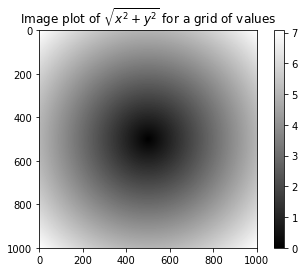

In [23]:
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")
plt.show()

# 将条件逻辑作为数组操作
np.where函数是三元表达式x if condition else y的向量化版本。假设我们有一个布尔值数组和两个数值数组：

In [30]:
xarr=np.array([1.1,1.2,1.3,1.4,1.5])
yarr=np.array([2.1,2.2,2.3,2.4,2.5])
cond=np.array([True,False,True,True,False])

假设cond中的元素为True时，我们取xarr中的对应元素值，否则取yarr中的元素值。我们可以通过列表推导式来完成，想下列代码这样：

In [32]:
result=[(x if c else y) for x,y,c in zip(xarr,yarr,cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

这样会产生多个问题。首先，如果数组很大的话，速度会很慢（因为所有的工作都是通过解释器解释Python代码完成）。其次，当数组时多维时，就无法奏效了。而使用np.where时，就可以非常简单地完成：

In [33]:
result=np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数并不需要是数组，它们可以是标量。where在数据分析中的一个典型用法是根据一个数组来生成一个新的数组。假设你有一个随机生成的矩阵数据，并且你想将其中的正值都替换为2，将所有的负值替换为-2，使用np.where会很容易实现：

In [34]:
arr=np.random.randn(4,4)
arr

array([[ 0.37768157,  0.87132483, -0.21936878, -0.64154013],
       [ 0.94397785, -2.92940172,  0.85071028,  1.24476128],
       [-0.97587705, -0.40039831, -0.55681282, -0.73297652],
       [-1.17187603,  0.13608935, -0.91025677, -0.05901802]])

In [35]:
arr>0

array([[ True,  True, False, False],
       [ True, False,  True,  True],
       [False, False, False, False],
       [False,  True, False, False]])

In [36]:
np.where(arr>0,2,-2)

array([[ 2,  2, -2, -2],
       [ 2, -2,  2,  2],
       [-2, -2, -2, -2],
       [-2,  2, -2, -2]])

你可以使用np.where将标量和数组联合，例如，我可以像下面的代码那样将arr中的所有正值替换为常数2：

In [37]:
np.where(arr>0,2,arr)#仅将正值设为2

array([[ 2.        ,  2.        , -0.21936878, -0.64154013],
       [ 2.        , -2.92940172,  2.        ,  2.        ],
       [-0.97587705, -0.40039831, -0.55681282, -0.73297652],
       [-1.17187603,  2.        , -0.91025677, -0.05901802]])

传递给np.where的数组既可以是同等大小的数组，也可以是标量。

# 数学和统计方法
许多关于计算整个数组统计值或关于轴向数据的数学函数，可以作为数组类型的方法被调用。你可以使用聚合函数（通常也叫缩减函数），比如sum、mean和std（标准差），既可以直接调用数组实例的方法，也可以使用顶层的NumPy函数。  
此处我生成了一些正太分布的随机数，并计算了部分聚合统计数据：

In [2]:
import numpy as np
arr=np.random.randn(5,4)
arr

array([[ 0.64533485, -1.09566203,  0.50307186,  2.07905559],
       [ 0.87547454, -0.62616502, -1.22374638,  0.60052239],
       [-1.27371384,  0.13219922, -0.52969465, -0.1525021 ],
       [ 1.70996428, -0.78685716, -0.44830161, -0.57237166],
       [ 0.60565218,  1.1722392 , -0.49318613,  0.41477271]])

In [3]:
arr.mean()

0.07680431183803353

In [4]:
np.mean(arr)

0.07680431183803353

In [5]:
arr.sum()

1.5360862367606707

像mean,sum等函数可以接收一个可选参数axis，这个参数可以用于计算给定轴向上的统计值，形成一个下降一维度的数组：

In [6]:
arr.mean(axis=1)

array([ 0.53295007, -0.09347862, -0.45592784, -0.02439154,  0.42486949])

arr.mean(1)表示“计算每一列的平均值”，而arr.sum(0)表示“计算行轴向的累和”。  
其他的方法，例如cumsum和cumprod并不会聚合，它们会产生一个中间结果：

In [7]:
arr=np.array([0,1,2,3,4,5,6,7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

在多维数组总，像cumsum这样的累积函数返回相同长度的数组，但是可以指定轴向上根据较低维度的切片进行部分聚合：

In [27]:
arr=np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [32]:
arr.mean(0)

array([3., 4., 5.])

In [14]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [13]:
arr.cumsum(1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

In [15]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

# 布尔值数组的方法
在前面介绍的方法，布尔值被强制为1（True）和0（False）。因此，sum通常可以用于计算布尔值数组中的True的个数：

In [16]:
arr=np.random.randn(100)
(arr>0).sum()

52

对于布尔值数组，有两个非常有用的方法any和all。any检查数组中是否至少有一个True,而all检查是否每个值都是True:

In [17]:
bools=np.array([False,False,True,False])
bools.any()

True

In [18]:
bools.all()

False

这些方法也可适用于非布尔值数组，所有的非0元素都会按True处理。

# 排序
和Python的内建列表类型相似，NumPy数组可以使用sort方法按位置排序：

In [33]:
arr=np.random.randn(6)
arr

array([-1.30378225,  0.39487043,  1.73803335, -0.90046318, -0.09182021,
       -1.34984572])

In [34]:
arr.sort()

In [21]:
arr

array([-1.10801191, -0.64435999, -0.39508618,  0.01556093,  0.86317303,
        1.4111791 ])

你可以在多维数组中根据传递的axis值，沿着轴向对每个一维数据段进行排序：

In [43]:
arr=np.random.randn(5,3)
arr

array([[ 0.77200456, -0.52290969,  2.06198457],
       [ 2.3461519 , -1.03883041,  0.42180049],
       [ 0.89782164,  0.72299162, -0.05652746],
       [ 1.17678973,  0.16738223,  0.7656029 ],
       [-1.00477509, -0.92757626,  0.1910988 ]])

In [44]:
arr.sort(0)
arr

array([[-1.00477509, -1.03883041, -0.05652746],
       [ 0.77200456, -0.92757626,  0.1910988 ],
       [ 0.89782164, -0.52290969,  0.42180049],
       [ 1.17678973,  0.16738223,  0.7656029 ],
       [ 2.3461519 ,  0.72299162,  2.06198457]])

In [45]:
arr.sort(1)
arr

array([[-1.03883041, -1.00477509, -0.05652746],
       [-0.92757626,  0.1910988 ,  0.77200456],
       [-0.52290969,  0.42180049,  0.89782164],
       [ 0.16738223,  0.7656029 ,  1.17678973],
       [ 0.72299162,  2.06198457,  2.3461519 ]])

顶层的np.sort方法返回的是一家排序好的数组拷贝，而不是对原数组按位置排序。下面的例子计算的是一个数组的分位数，并选出分位数所对应的值，这是一种应急的方式：

In [48]:
large_arr=np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05*len(large_arr))] # 5% quantile

-1.6102728174697314

# 唯一值与其他集合逻辑
NumPy包含一些针对一维ndarray的基础集合操作。常用的一个方法是np.unique,返回的是数组中唯一值排序后形成的数组：

In [49]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [50]:
ints=np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

将np.unique和纯Python实现相比较：

In [51]:
sorted(set(names))

['Bob', 'Joe', 'Will']

另一个函数，np.in1d,可以检查一个数组中的值是否在另外一个数组中，并返回一个布尔值数组：

In [52]:
values=np.array([6,0,0,3,2,5,6])
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])

# 使用数组进行文件输入和输出
Numpy可以在硬盘中将数据以文本或二进制文件的形式进行存入硬盘或由硬盘载入。  
np.save和np.load是高效存取硬盘数据的两大工具函数，数组在默认情况下是以未压缩的格式进行存储的，后缀名是.npy：

In [53]:
arr=np.arange(10)
np.save('some_array',arr)

如果文件存放路径中没写.npy时，后缀名会被自动加上。硬盘上的数组可以使用np.load进行载入：

In [54]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

你可以使用np.savez并将数组作为参数传递给该函数，用于在未压缩文件中保存多个数组：

In [55]:
np.savez('array_archive.npz',a=arr,b=arr)

当载入一个.npy文件的时候，你会获得一个字典型的对象，并通过该对象很方便地载入单个数组：

In [57]:
arch=np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

如果你的数据已经压缩好了，你可能会想要使用numpy.savez_compressed将数据存入已经压缩的文件：

In [58]:
np.savez_compressed('arrays_compressed.npz',a=arr,b=arr)

# 线性代数
线性代数，比如矩阵乘法、分解、行列式等方阵数学，是所有数组类库的重要组成部分。和Matlab等其他语言相比，NumPy的线性代数中所不同的是*是矩阵逐元素乘积，而不是矩阵的点乘积。因此NumPy的数组方法和numpy命名空间中都有一个函数dot，用于矩阵的操作：

In [41]:
import numpy as np
x=np.array([[1.,2.,3.],[4.,5.,6.]])
y=np.array([[6,23.],[-1,7],[8,9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [61]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y)等价于np.dot(x,y):

In [63]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

一个二维数组和一个长度合适的一维数组之间的矩阵乘积，其结果是一个一维数组：

In [66]:
np.dot(x,np.ones(3))

array([ 6., 15.])

特殊符号@也作为中缀操作符，用于点乘矩阵操作：

In [67]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg拥有一个矩阵分解的标准函数集，以及其他常用函数，例如求逆和行列式分解。这些函数都是通过在MATLAB和R等其他语言使用的相同的行业标准线性代数库来实现的，例如BLAS,LAPACK或英特尔专有的MKL（数学核心库）（是否使用MKL取决于使用NumPy的版本）：

In [68]:
from numpy.linalg import inv,qr
X=np.random.randn(5,5)
mat=X.T.dot(X)
inv(mat)

array([[ 43.04558099,  37.32902914,  32.73047952, -48.91703128,
        -18.12971806],
       [ 37.32902914,  33.50610383,  28.43225288, -42.76423913,
        -16.01474206],
       [ 32.73047952,  28.43225288,  25.42537559, -37.43636631,
        -13.94972383],
       [-48.91703128, -42.76423913, -37.43636631,  56.17591516,
         20.93816743],
       [-18.12971806, -16.01474206, -13.94972383,  20.93816743,
          8.03689876]])

In [69]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  0.00000000e+00,  1.77635684e-14,
         7.10542736e-15, -8.88178420e-15],
       [ 3.55271368e-15,  1.00000000e+00, -7.10542736e-15,
        -3.55271368e-15,  8.88178420e-16],
       [-1.24344979e-14, -1.50990331e-14,  1.00000000e+00,
         1.24344979e-14,  7.10542736e-15],
       [ 2.13162821e-14,  2.13162821e-14,  2.84217094e-14,
         1.00000000e+00, -1.42108547e-14],
       [ 0.00000000e+00, -2.84217094e-14, -2.84217094e-14,
         1.42108547e-14,  1.00000000e+00]])

In [70]:
q,r=qr(mat)

In [71]:
r

array([[-3.96916804,  0.46224102,  0.82070562, -4.15992702,  4.27363535],
       [ 0.        , -1.3944454 , -1.17649701, -1.53611751, -0.85476818],
       [ 0.        ,  0.        , -2.30235977, -1.88544771,  0.92692799],
       [ 0.        ,  0.        ,  0.        , -1.41486448,  3.79256524],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.02792085]])

In [72]:
q

array([[-0.72657118,  0.07841017,  0.06822231,  0.45283146, -0.50619715],
       [ 0.11216197, -0.79310438,  0.32394896, -0.23135115, -0.44714522],
       [ 0.21304784, -0.12966473, -0.88444015,  0.06214721, -0.38948815],
       [-0.53731943, -0.51391665, -0.31659355, -0.07194095,  0.58461144],
       [ 0.35413623, -0.28967917,  0.08908948,  0.85579351,  0.22439705]])

表达式X.T.dot(X)计算的是X和它的转置矩阵X.T的点乘积。

# 伪随机数生成
numpy.random模块填补了Python内建的random模块的不足，可以高效地生成多种概率分布下的完整样本值数组。例如，你可以使用normal来获得一个4*4的正态
分布样本数组：

In [3]:
import numpy as np
samples=np.random.normal(size=(4,4))
samples

array([[-1.45287655,  0.42419105, -0.68756245,  0.12852223],
       [-1.04972284,  1.76346355, -1.24068395,  0.66038413],
       [ 0.01927702, -1.10653185, -1.47076885, -0.10034039],
       [-1.47431332,  0.87039385,  1.29136933, -0.79688792]])

然而Python内建的random模块一次只能生成一个值。你可以从下面的示例中看到，numpy.random在生成大型样本时比纯Python的方式快了一个数量级：

In [4]:
from random import normalvariate

N=1000000
%timeit samples=[normalvariate(0,1) for _ in range(N)]

1.65 s ± 172 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit np.random.normal(size=N)

49 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们可以称这些为伪随机数，因为它们是由具有确定性行为的算法根据随机数生成器中的随机数种子生成的，你可以通过np.random.seed更改为NumPy的随机数种子：

In [6]:
np.random.seed(1234)

numpy.random中的数据生成器公用了一个全局的随机数种子。为了避免全局状态，你可以使用numpy.random.RandomState生成一个随机数生成器，使数据独立于其他的随机数状态：

# 随机漫步
随机漫步的模拟（https://en.wikipedia.org/wiki/Random_walk）提供了一个使用数组操作的说明性应用。首先，让我们考虑一个简单的随机漫步，从0开始，步进为1和-1，且两种步进发生的概率相等。  
以下是使用内建random模块利用纯Python实现的一个1000步的随机漫步：

In [23]:
import random
position=0
walk=[position]
steps=1000
for i in range(steps):
    step=1 if random.randint(0,1) else -1
    position+=step
    walk.append(position)

下图是对上面随机漫步的前100步的可视化：

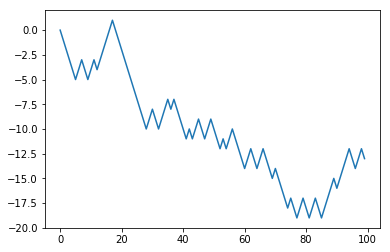

In [25]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])

你可能会观察到walk这是对随机步进的累积，并且可以通过一个数组表达式实现。因此，我使用np.random模块一次性抽取1000次投掷硬币的结果，每次投掷的结果为1或-1，然后计算累积值：

In [26]:
nsteps=1000
draws=np.random.randint(0,2,size=nsteps)
steps=np.where(draws>0,1,-1)
walk=steps.cumsum()

由此我们开始从漫步轨道上提取一些统计数据，比如最大值、最小值等：

In [27]:
walk.min()

-9

In [28]:
walk.max()

60

更复杂的统计是第一次穿越时间，即随机漫步的某一步达到了某个特定值。这里假设我们想要知道漫步中是何时连续朝某个方向连续走了10步。np.abs(walk)>=10给我们一个布尔值数组，用于表明漫步是否连续在同一方向走了十步，但是我们想要的是第一次走了10步或-10步的位置。我们可以使用argmax来计算，该函数可以返回布尔值数组中最大值的第一个位置（True就是最大值）:

In [29]:
(np.abs(walk)>=10).argmax()

297

请注意，这里使用argmax效率并不高，因为它总是完整地扫描整个数组。在这个特殊的示例中，一旦True被发现，我们就知道最大值了。

# 一次性模拟多次随机漫步
如果你的目标是模拟多次随机漫步，比如说5000步。你可以稍微修改下之前的代码来生成所有的随机步。如果传入一个2个元素的元组，numpy.random中的函数可以生成一个二维的抽取数组，并且我们可以一次性地跨行计算出全部5000个随机步的累积和：

In [32]:
nwalks=5000

nsteps=1000

draws=np.random.randint(0,2,size=(nwalks,nsteps)) # 0或1

steps=np.where(draws>0,1,-1)

walks=steps.cumsum(1)
walks

array([[ -1,   0,   1, ...,  -6,  -7,  -8],
       [ -1,  -2,  -1, ...,  34,  35,  34],
       [ -1,  -2,  -3, ...,  22,  23,  22],
       ...,
       [ -1,   0,   1, ..., -12, -13, -12],
       [ -1,  -2,  -1, ..., 100, 101, 100],
       [  1,   2,   1, ...,  18,  17,  16]], dtype=int32)

现在我们可以计算出这些随机步的最大值和最小值了：

In [33]:
walks.max()

119

In [34]:
walks.min()

-113

让我们在这些随机步中计算出30或-30的最小穿越时间。这有点棘手，因为不是所有的5000个都达到了30。我们可以用any方法来检查：

In [35]:
hits30=(np.abs(walks)>=30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [37]:
hits30.sum() #达到30或-30的数字

3361

我们可以使用布尔值数组来选出绝对步数超过30的步所在的行，并使用argmax从轴向1上获取穿越时间：

In [38]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1)
crossing_times.mean()

513.9675691758405

利用其它分布而不是等概率的掷硬币实验来随机漫步也是很容易的。你只需要使用一个不同的随机数生成函数，比如normal，再根据特定的均值和标准差即可生成正态分布下的随机步：

In [47]:
steps=np.random.normal(loc=0,scale=0.25,size=(nwalks,nsteps))